CONTEXTO

Una empresa que fabrica electrodomésticos desea mejorar sus ganancias en el próximo año. Actualmente,
la empresa invierte en medios publicitarios como televisión, radio y periódicos. La empresa registra el dinero
invertido en cada medio publicitario (en miles de dólares) y la cantidad de unidades de producto vendidas
(en miles de unidades). Usted es contratado como consultor y tiene la misión de construir un modelo
predictivo que le ayude a la empresa a determinar la forma más eficaz de invertir el dinero en publicidad de
tal manera que se logre un incrementó en las ventas.

# A. Preparación de los datos: Para los datos disponibles

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CARGAR DATOS

In [ ]:
durl_file_path = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/advertising2.csv'
data = pd.read_csv(durl_file_path)
data.head()

,TV,Radio,Newspaper,Sales
0,164.5,20.9,47.4,"17,5"
1,NaN,NaN,NaN,"15,130500000000003"
2,75.5,10.8,6.0,"11,9"
3,237.4,5.1,23.5,"17,5"
4,97.5,7.6,7.2,"13,7"


Analisis:
* La variable a predecir (y) sera Sales

INFORMACION DEL DATAFRAME

Resumen de los datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      208 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.6+ KB


TRATAMIENTO DE DATOS

Cambiar el tipo de valores object de la columna Sales a tipo float

In [ ]:
data.Sales = data.Sales.map(lambda x: float(x.replace(',', '.')))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      208 non-null    float64
dtypes: float64(4)
memory usage: 6.6 KB


Implementacion de sklearn

Separacion de datos de entrenamiento y de test

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=3, shuffle=True) #Separa en dos grupos, 20% para test y 80% para entrenamiento, shuffle: es para mezclarlos

Determinar valores faltantes (Null)

In [ ]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,True,True,True,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
203,False,False,False,False
204,False,False,False,False
205,False,False,False,False
206,False,False,False,False


In [ ]:
data.isnull().sum()

TV           8
Radio        8
Newspaper    8
Sales        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e5fb0aa90>,
      dtype=object)

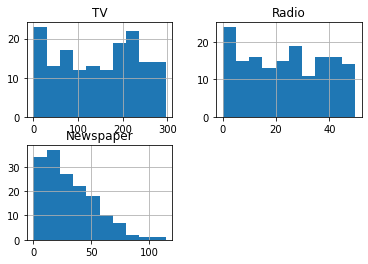

In [ ]:
train[['TV', 'Radio', 'Newspaper']].hist()

En caso de existir valores null remplace los valores faltantes por la
media de la columna

In [ ]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy="mean")

Proceso de escalado de los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

standar_scaler = StandardScaler()

Construya un pipeline que incluya los pasos de imputación de valores faltantes y el proceso de
escalado

In [ ]:
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps=[("numerical_imputer", simple_imputer),
           ("scaler", standar_scaler)])

Realice las transformaciones sobre los datos de entrenamiento utilizando el pipeline

Se cambia la escala de los datos TV, Radio y Newspaper

In [ ]:
transformed_train = preprocessor.fit_transform(train[['TV', 'Radio', 'Newspaper']])


transformed_train = pd.DataFrame(transformed_train, columns=['TV', 'Radio', 'Newspaper'], index=train.index)

transformed_train['Sales'] = train['Sales']
transformed_train.head()
#transformed_train['Sales'] = train['Sales']

,TV,Radio,Newspaper,Sales
134,-0.076345,-0.619784,-0.960489,13.4
41,-1.066853,-1.471665,-0.446195,8.1
151,0.682121,1.465621,-0.528849,22.6
161,0.901464,-1.444405,-0.712526,16.6
15,-1.585196,-1.464850,-1.382945,4.8


In [ ]:
transformed_train.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# B. Análisis exploratorio: Realice una exploración de los datos sobre los datos de entrenamiento

Genere un resumen estadístico utilizando el método describe()

In [ ]:
transformed_train.describe()

,TV,Radio,Newspaper,Sales
count,1.660000e+02,1.660000e+02,1.660000e+02,166.000000
mean,-2.782246e-16,-2.514722e-16,1.391123e-16,15.112732
std,1.003026e+00,1.003026e+00,1.003026e+00,5.440482
min,-1.676397e+00,-1.607966e+00,-1.415088e+00,1.600000
25%,-8.697331e-01,-8.821630e-01,-7.768125e-01,11.000000
50%,-3.281111e-16,0.000000e+00,-1.775683e-01,15.550000
75%,8.356608e-01,8.812308e-01,6.420876e-01,19.350000
max,1.737277e+00,1.772298e+00,3.805913e+00,27.000000


Genere el histograma de frecuencias para todas las características disponibles

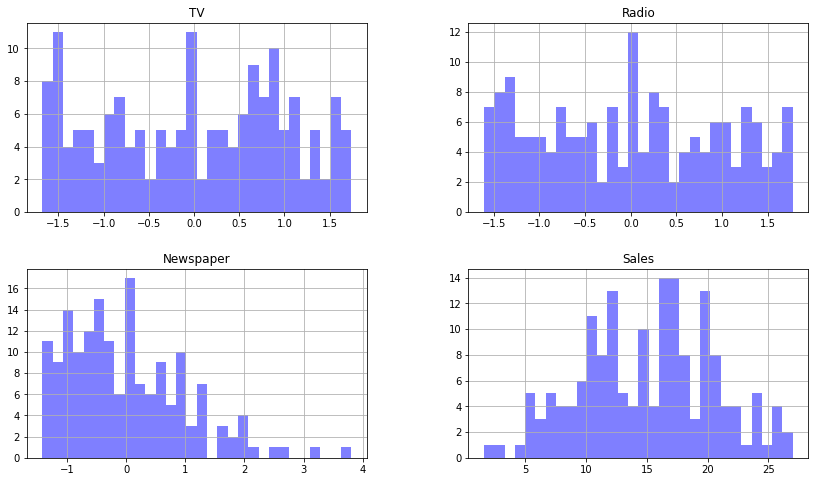

In [ ]:
transformed_train.hist(bins=30, figsize=(14,8), color="blue", alpha=0.5)
plt.show()

Identifique posibles valores atípicos en los datos

Diagrama de cajas

Cuartiles
No es suceptible a valores extremos como la media, etc
Se consideran valores atipicos a los valores poco frecuentes y no hace parte de los datos normales
Estos condicionan el aprendizaje del modelo

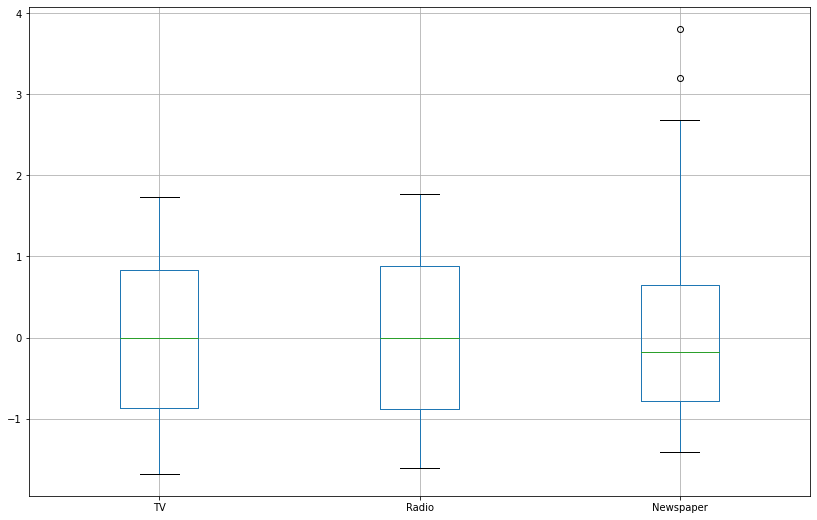

In [ ]:
transformed_train[['TV', 'Radio', 'Newspaper']].boxplot(figsize=(14,9))
plt.show()

Analisis:
* Existen dos valores atipicos en la variableNewspaper (representados en dos puntos en los rangos de 3 a 4)
* Como son solo dos datos, se pueden mantener estos sin necesidad de eliminarlos

Diagramas de dispersion

Genere una matriz de dispersión para identificar correlaciones entre variables

Matriz de correlacion. que tan correlacionadas estan las variables entre si

Identificar tendencias en los datos

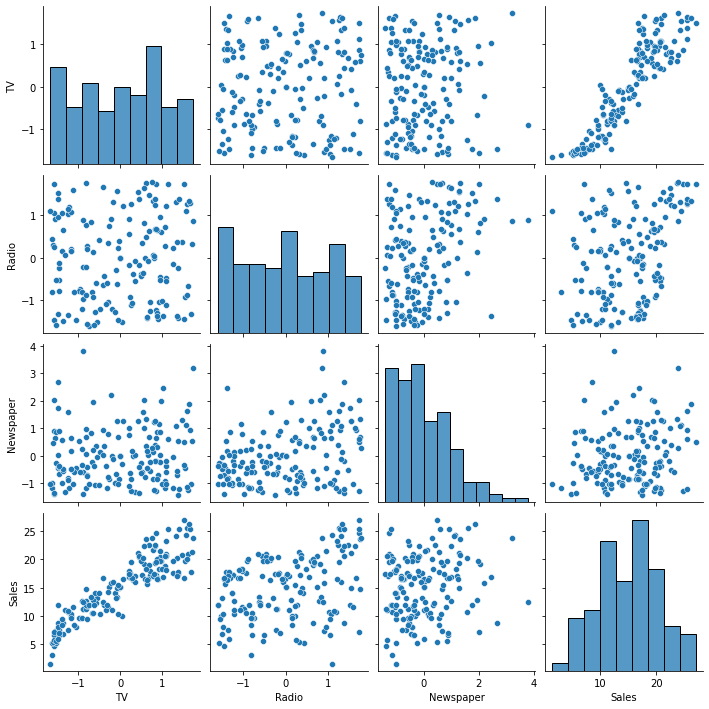

In [ ]:
sns.pairplot(transformed_train)

Analisis:
* TV influye de mayor forma en las ventas (Sales)

Considerando los valores de correlación determine cuales variables podrían tener una mayor influencia sobre el modelo.


Mismos datos de las graficas anteriores, en forma numerica

In [ ]:
transformed_train.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.053499,0.075940,0.909078
Radio,0.053499,1.000000,0.334141,0.340848
Newspaper,0.075940,0.334141,1.000000,0.168985
Sales,0.909078,0.340848,0.168985,1.000000


Analisis:
* Aquel valor mas cercano a 1 es aquel que tiene mas influencia
* Un valor negativo es que es inversamente proporcional (-1 a -0.01. donde -1 es que es totalmente inversa la relacion)

Genere la matriz de correlación para todas las características y preséntela a través de un mapa
de calor

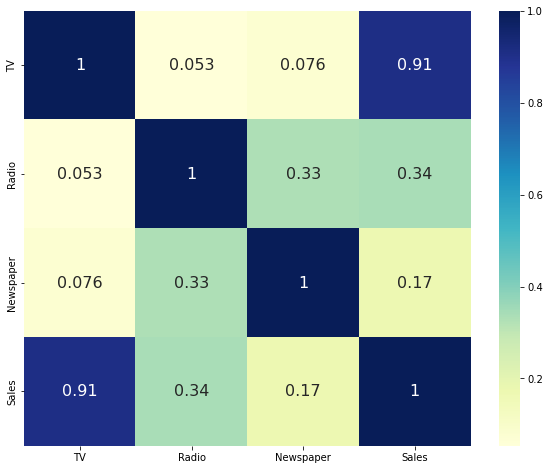

In [ ]:
plt.figure(figsize=(10, 8))
plt.rc({'size': '18'})
sns.heatmap(transformed_train.corr(), annot=True, cmap="YlGnBu", annot_kws={"size":16})

# C. Generar el modelo

In [ ]:
from sklearn.linear_model import SGDRegressor

model_result = {}
X_train, y_train = train.drop('Sales', axis='columns'), train['Sales']
X_train.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

Construya un modelo para cada uno de los medios publicitarios disponibles (un modelo por cada
característica). Utilice el pipeline de preprocesamiento generado en el paso anterior y agregue
el estimador correspondiente.

In [ ]:
for feature in X_train.columns:

  regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler()),
           ("sgd", SGDRegressor())])

  regressorSGD.fit(X_train[feature].values.reshape(-1,1), y_train)

  model_result[feature] = regressorSGD

En cada caso genere un gráfico con los datos de entrenamiento y la línea de regresión

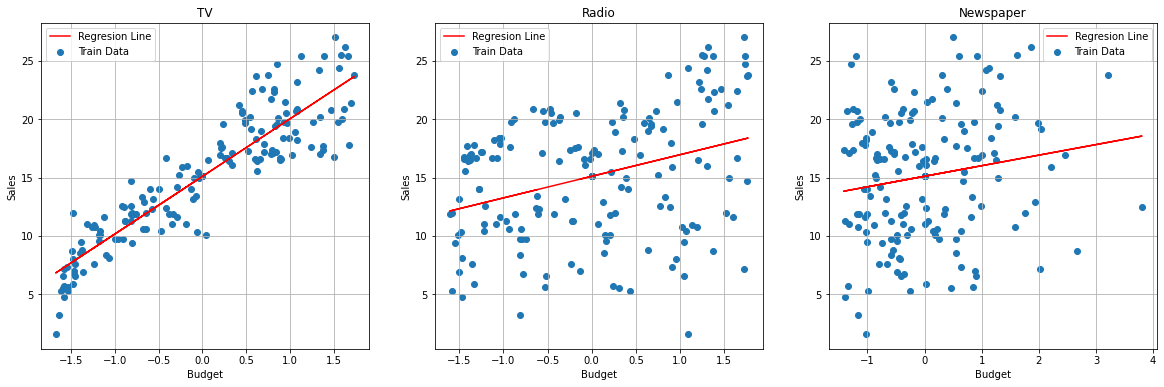

In [ ]:
fig, axes = plt.subplots(1, len(X_train.columns), figsize=(20, 6))

for i in range(3):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)

  axes[i].scatter(transformed_train.iloc[:,i], y_values, label='Train Data')
  model = model_result[X_train.columns[i]]
  predicted = model.predict(X_values)

  axes[i].plot(transformed_train.iloc[:,i], predicted, color='red', label='Regresion Line')
  axes[i].set_title(X_train.columns[i])
  axes[i].set_xlabel('Budget')
  axes[i].set_ylabel('Sales')
  axes[i].grid()
  axes[i].legend()

Para los tres casos, genere los diagramas de residuos utilizando el conjunto de datos de entrenamiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


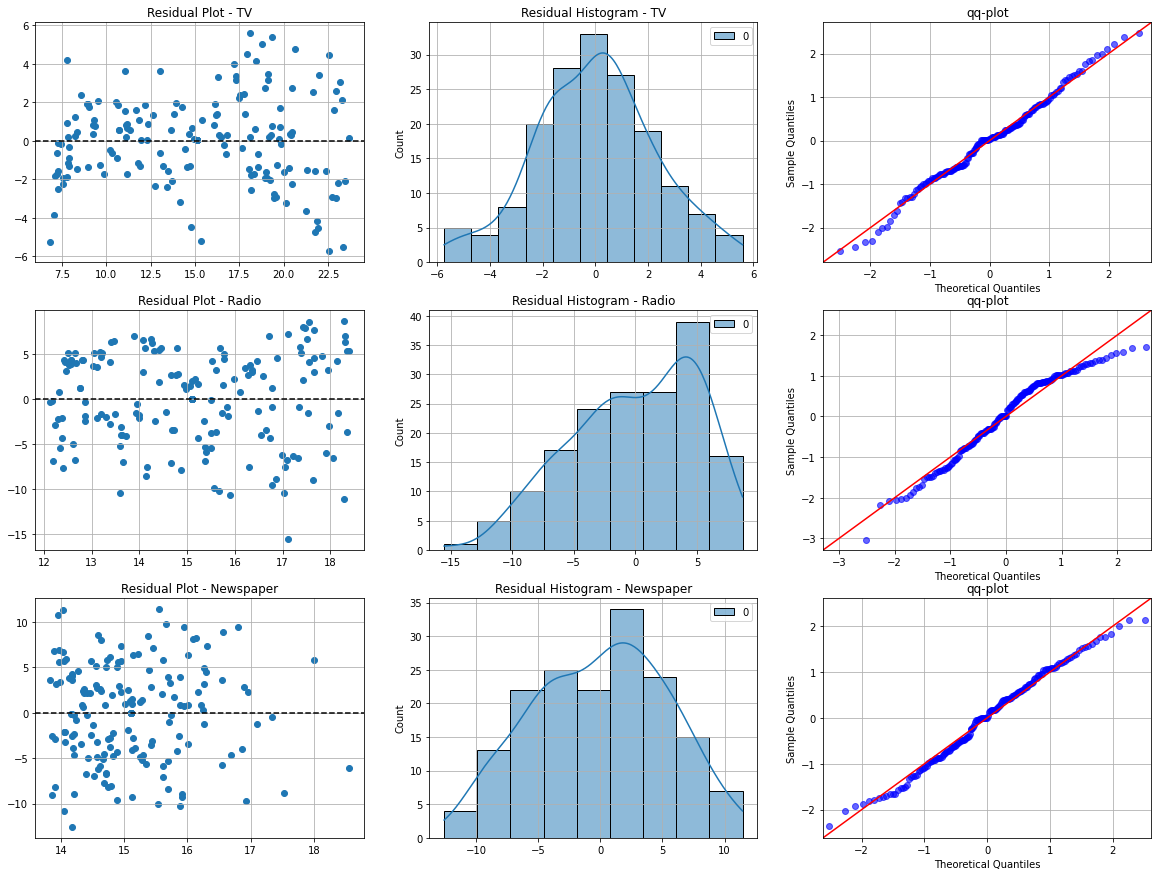

In [ ]:
!pip install statsmodels
from statsmodels.api import qqplot

selected = ['TV','Radio','Newspaper']
residuals_train = {}
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, feature in enumerate(selected):

  X_values = X_train[feature].values.reshape(-1,1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  y_pred = model.predict(X_values)
  residual =  y_values - y_pred.reshape(-1,1)
  residuals_train[feature] = residual
  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred, residual)
  axes[i][0].set_title('Residual Plot - ' +  feature)
  sns.histplot(residual, kde=True, ax=axes[i][1])
  axes[i][1].set_title('Residual Histogram - ' +  feature)
  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6)
  axes[i][2].set_title('qq-plot')
  axes[i][0].grid()
  axes[i][1].grid()
  axes[i][2].grid()

Analisis:
* Relacion lineal entre TV vs Sales
* No es muy lineal la revision Radio vs Sales

Compare los coeficientes de determinación obtenidos mediante un diagrama de barras

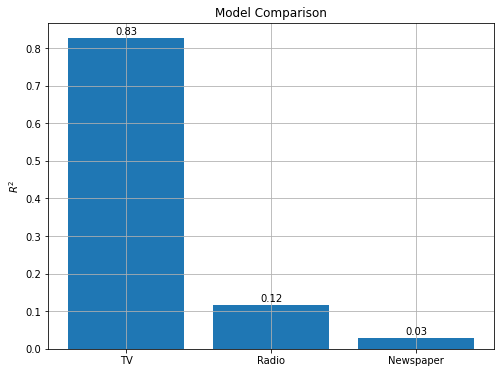

In [ ]:
scores = []
for i, feature in enumerate(X_train.columns):
  X_values = X_train.iloc[:,i].values.reshape(-1, 1)
  y_values = y_train.values.reshape(-1, 1)
  model = model_result[feature]
  scores.append(model.score(X_values, y_values))

plt.figure(figsize=(8,6))
plt.bar(X_train.columns, scores)
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(X_train.columns, scores)

Construya un modelo para todas las posibles combinaciones de características. En este caso,
puede utilizar el módulo itertools para generar todas las posibles combinaciones. Utilice el
pipeline de preprocesamiento generado en el paso anterior y agregue el estimador
correspondiente

In [ ]:
from itertools import combinations

all_combinatios = []
model_final = {}
features = ['TV', 'Radio', 'Newspaper']
final_scores = []
for i in range(1, 4):
  all_combinatios += list(combinations(features, i))

all_combinatios = [list(combination) for combination in all_combinatios]
all_combinatios

[['TV'],
 ['Radio'],
 ['Newspaper'],
 ['TV', 'Radio'],
 ['TV', 'Newspaper'],
 ['Radio', 'Newspaper'],
 ['TV', 'Radio', 'Newspaper']]

In [ ]:
for combination in all_combinatios:
   sgd = SGDRegressor()
   X_values = X_train[combination].values.reshape(-1, len(combination))
   y_values = y_train.ravel()

   regressorSGD = Pipeline(
      steps=[("numerical_imputer", SimpleImputer(strategy='mean')),
           ("scaler", StandardScaler()),
           ("sgd", SGDRegressor())])

   regressorSGD.fit(X_values, y_values)
   y_pred = regressorSGD.predict(X_values)
   model_final[combination.__repr__()] = regressorSGD
   final_scores.append(regressorSGD.score(X_values, y_values))

Compare los coeficientes de correlación obtenidos en todos los modelos mediante un diagrama de barras


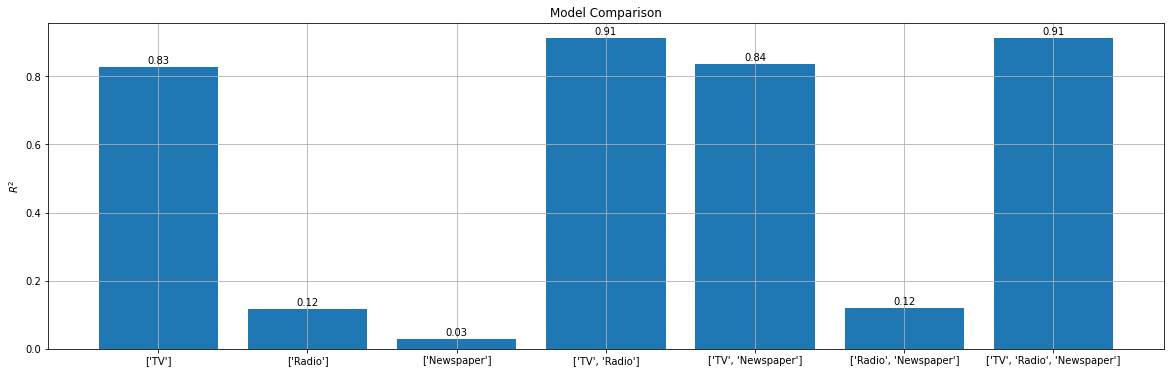

In [ ]:
plt.figure(figsize=(20,6))
plt.bar(model_final.keys(), final_scores)
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, round(y[i],2), ha = 'center')

add_labels(model_final.keys(), final_scores)

Analisis:
* Newspaper es el que menos aporta a las ventas (Sales)
* TV aporta mas a las ventas

# D. Evaluación de desempeño

Evalúe cada modelo con los datos de prueba. Recuerde utilizar el pipeline realizar las estimaciones.

In [ ]:
test_scores = []

X_test, y_test = test.drop('Sales', axis='columns'), test['Sales']

for combination in all_combinatios:

  X_values = X_test[combination].values.reshape(-1,len(combination))
  y_values = y_test.values.reshape(-1, 1)

  model = model_final[combination.__repr__()]
  test_scores.append(model.score(X_values, y_values))

NameError: ignored

Compare los coeficientes de determinación de los datos de prueba con lo obtenidos en los datos de entrenamiento a través de un gráfico de barras

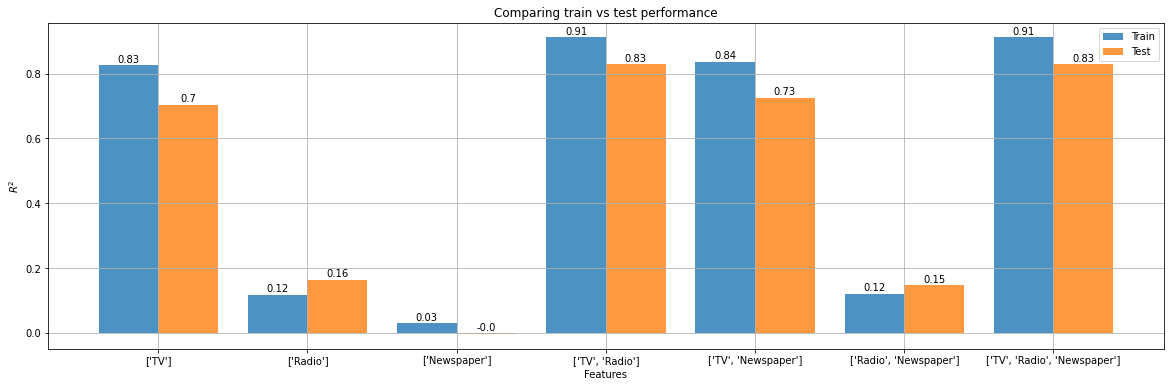

In [ ]:
plt.figure(figsize=(20,6))

X_axis = np.arange(len(model_final.keys()))

plt.bar(X_axis - 0.2, final_scores, 0.4, label = 'Train', alpha=0.8)
plt.bar(X_axis + 0.2,test_scores, 0.4, label = 'Test', alpha=0.8)

plt.ylabel('$R^2$')
plt.title('Test Comparison')
plt.grid()
plt.xticks(X_axis, model_final.keys())
plt.xlabel("Features")
plt.title("Comparing train vs test performance")
plt.legend()

def addlabels(x, y, val):
    for i in range(len(x)):
        plt.text(i + val , y[i] + 0.01, round(y[i],2), ha = 'center')

addlabels(model_final.keys(), final_scores, - 0.2)
addlabels(model_final.keys(), test_scores, + 0.2)
plt.show()

Realice el análisis de residuos para el conjunto de prueba. Compare los resultados obtenidos con los datos de entrenamiento.

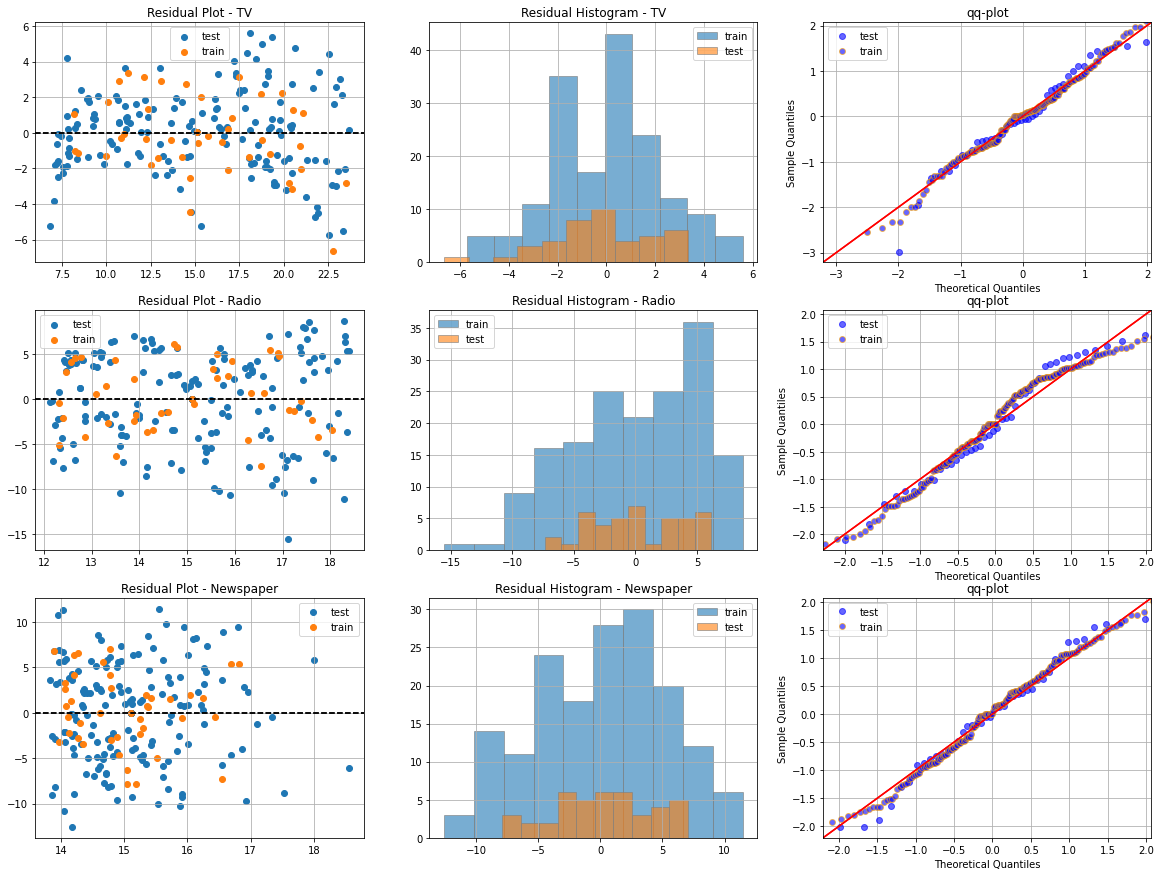

In [ ]:
selected = ['TV','Radio','Newspaper']
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, combination in enumerate(selected):

  X_train_values = X_train[combination].values.reshape(-1,1)
  residual_ = residuals_train[combination]

  X_test_values = X_test[combination].values.reshape(-1,1)
  y_values = y_test.values.reshape(-1, 1)
  model = model_result[combination]
  y_pred = model.predict(X_test_values)
  y_pred_ = model.predict(X_train_values)
  residual = y_values - y_pred.reshape(-1,1)
  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred_, residual_, label='test')
  axes[i][0].set_title('Residual Plot - ' +  feature)

  axes[i][0].axhline(y=0, color='black', linestyle='--')
  axes[i][0].scatter(y_pred, residual, label='train')
  axes[i][0].set_title('Residual Plot - ' +  combination)
  axes[i][0].legend()
  axes[i][0].grid()

  axes[i][1].hist(residual_, alpha= 0.6, ec="grey", label='train')
  axes[i][1].hist(residual, alpha= 0.6, ec="grey", label='test')
  axes[i][1].set_title('Residual Histogram - ' +  combination)
  axes[i][1].legend()
  axes[i][1].grid()

  qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, label='test')
  axes[i][2].set_title('qq-plot')
  qqplot(np.sort(residual_.flatten()), fit=True, line="45", ax=axes[i][2], alpha= 0.6, color='orange', label='train')
  axes[i][2].set_title('qq-plot')
  axes[i][2].grid()
  axes[i][2].legend()